<h2 style="color:#2c3f51"> TPS MAY 2022 </h2>

- Try LGBMClassifier
- Experiment with new features
- Search best params with Optuna 
- Make Cross Validation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import optuna
import gc

# Loading Data

In [2]:
train = pd.read_csv("../input/tabular-playground-series-may-2022/train.csv")
test = pd.read_csv("../input/tabular-playground-series-may-2022/test.csv")

train.shape, test.shape

((900000, 33), (700000, 32))

# Understanding Data

- Describe

In [3]:
train.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765473,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [4]:
test.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
count,7.000000e+05,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,...,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,1.250000e+06,-0.000087,-0.000732,-0.000385,0.000705,0.000800,-0.000468,0.002550,2.030819,2.056923,...,-0.173972,-0.153938,-0.005623,-0.371983,-0.340683,0.174245,0.356288,0.604213,0.346090,1.003081
std,2.020727e+05,1.000264,0.997131,1.000317,1.001758,0.999088,1.000249,0.999536,1.655909,1.591726,...,2.397938,2.484198,2.450907,2.452619,2.388938,2.417555,2.477713,238.888993,0.475723,0.819673
min,9.000000e+05,-4.658018,-4.922718,-4.457561,-4.567419,-4.675301,-5.141356,-4.782164,0.000000,0.000000,...,-11.089910,-12.186778,-11.700814,-12.104478,-11.838417,-13.312784,-13.462486,-1204.243716,0.000000,0.000000
25%,1.075000e+06,-0.675708,-0.674040,-0.675961,-0.674561,-0.674696,-0.674444,-0.671481,1.000000,1.000000,...,-1.794757,-1.816739,-1.641035,-2.021342,-1.948923,-1.443815,-1.263991,-158.660917,0.000000,0.000000
50%,1.250000e+06,-0.000395,-0.000241,-0.000723,-0.000294,0.000276,-0.001674,0.002623,2.000000,2.000000,...,-0.184945,-0.149100,0.033726,-0.396281,-0.339431,0.165229,0.399981,0.671386,0.000000,1.000000
75%,1.424999e+06,0.675788,0.671415,0.673105,0.676376,0.674542,0.674146,0.676590,3.000000,3.000000,...,1.447103,1.508052,1.664146,1.251361,1.269879,1.794429,2.025163,159.789006,1.000000,2.000000
max,1.599999e+06,5.761950,4.768073,4.599902,4.899904,4.494312,4.701004,4.673145,16.000000,13.000000,...,10.691366,11.999494,10.991597,11.366652,10.236546,11.294340,12.811976,1141.957328,1.000000,2.000000


- Infos

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

We have :
- 16 float64 columns
- 16 int64 columns
- 1 object columns

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      700000 non-null  int64  
 1   f_00    700000 non-null  float64
 2   f_01    700000 non-null  float64
 3   f_02    700000 non-null  float64
 4   f_03    700000 non-null  float64
 5   f_04    700000 non-null  float64
 6   f_05    700000 non-null  float64
 7   f_06    700000 non-null  float64
 8   f_07    700000 non-null  int64  
 9   f_08    700000 non-null  int64  
 10  f_09    700000 non-null  int64  
 11  f_10    700000 non-null  int64  
 12  f_11    700000 non-null  int64  
 13  f_12    700000 non-null  int64  
 14  f_13    700000 non-null  int64  
 15  f_14    700000 non-null  int64  
 16  f_15    700000 non-null  int64  
 17  f_16    700000 non-null  int64  
 18  f_17    700000 non-null  int64  
 19  f_18    700000 non-null  int64  
 20  f_19    700000 non-null  float64
 21  f_20    70

- Check missing columns

In [7]:
train.isna().sum().any()

False

In [8]:
test.isna().sum().any()

False

# Feature Engineering (from @ambrosm)

Nous remercions @ambrosm pour le travail fait et partagé sur cette section dans son [carnet](https://www.kaggle.com/code/ambrosm/tpsmay22-keras-quickstart#Feature-engineering).

"*We read the data and apply minimal feature engineering: We only split the f_27 string into ten separate features as described in the [EDA](https://www.kaggle.com/code/ambrosm/tpsmay22-eda-which-makes-sense), and we count the unique characters in the string.*"

In [9]:
for df in [train, test]:
    for i in range(10):
        df[f'ch{i}'] = df.f_27.str.get(i).apply(ord) - ord('A')
    # Next feature is from https://www.kaggle.com/code/cabaxiom/tps-may-22-eda-lgbm-model
    df["unique_characters"] = df.f_27.apply(lambda s: len(set(s)))
features = [f for f in test.columns if f != 'id' and f != 'f_27']
test[features].head(2)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,unique_characters
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,0,0,0,1,0,3,11,0,2,5
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,5,0,1,1,0,4,6,2,1,6


# Modeling

In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

### Split Data

In [11]:
y = train["target"]
X = train.drop(columns=["id","f_27", "target"])

test = test.drop(columns=["id","f_27"])

X.shape, test.shape

((900000, 41), (700000, 41))

In [12]:
from sklearn.model_selection import train_test_split

_, X_test, _, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Search best params with optuna

In [13]:
from lightgbm import LGBMClassifier

import time

In [14]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objectivesLGBM(trial):
    params = {
        #'max_depth' : trial.suggest_int("max_depth", 1, 16),
        'n_estimators': trial.suggest_int('n_estimators', 5, 5000),
        #'random_state': trial.suggest_int("random_state", 0, 722),
        'learning_rate': trial.suggest_float('learning_rate', 0, 1),
        
        #'num_leaves': trial.suggest_int('num_leaves', 100, 2000),
        #'max_bin': trial.suggest_int('max_bin', 2, 100),
        
        'device' : 'gpu',
        'n_jobs' : -1,
        'verbose': 0
    }

    model = LGBMClassifier(**params)
    model.fit(X,y)

    return model.score(X,y)

#opt = optuna.create_study(direction='maximize')
#opt.optimize(objectivesLGBM, n_trials=5)

In [15]:
"""
params = opt.best_params

params['device'] = 'gpu'
params['n_jobs'] = -1
params['verbose'] = 0
"""

params = {'n_estimators': 3157,
 'learning_rate': 0.5167727577207912,
 'device': 'gpu',
 'n_jobs': -1,
 'verbose': 0}

### Check features important

In [16]:
model = LGBMClassifier(**params)
model.fit(X, y)

print("Training score :", model.score(X, y))

pred_y_test = model.predict(X_test)
print("Roc auc score  :", roc_auc_score(y_test, pred_y_test))

Training score : 0.9999633333333333
Roc auc score  : 0.9999522514622111


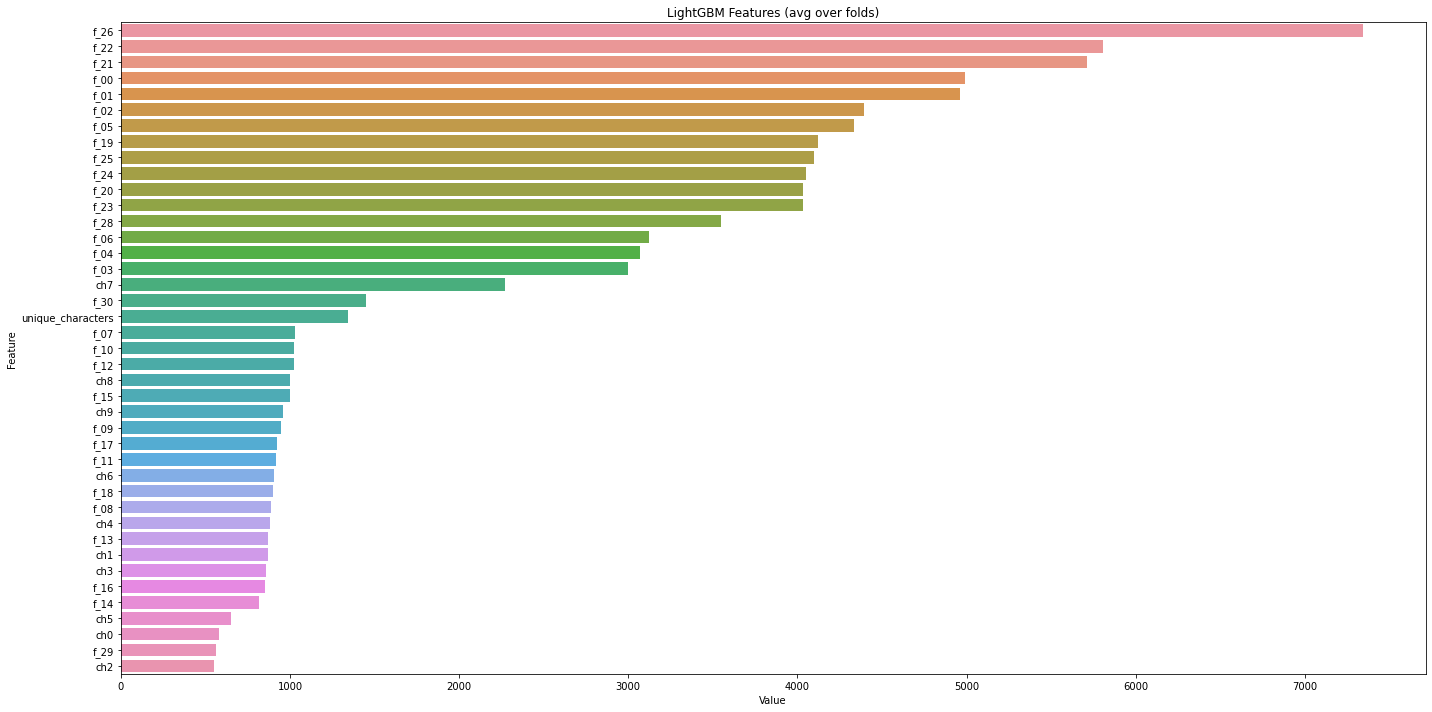

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [18]:
feature_imp = feature_imp.sort_values(by = "Value", ascending=False)
feature_imp

,Value,Feature
40,7347,f_26
39,5808,f_22
38,5710,f_21
37,4992,f_00
36,4961,f_01
35,4393,f_02
34,4337,f_05
33,4124,f_19
32,4101,f_25
31,4049,f_24


In [19]:
# Selected 6 Best Features
selected_features = feature_imp[:6]['Feature'].tolist()
selected_features

['f_26', 'f_22', 'f_21', 'f_00', 'f_01', 'f_02']

In [20]:
#X = X[selected_features]
#test = test[selected_features]

X.shape, test.shape

((900000, 41), (700000, 41))

### Add Basics Features

In [21]:
def add_basics_features(data, features):
    
    for feature in features:
        """
        new_feature_name = str(feature) + '_min'
        data[new_feature_name] = data[feature].min()
        
        new_feature_name = str(feature) + '_max'
        data[new_feature_name] = data[feature].max()
        """
        
        new_feature_name = str(feature) + '_mean'
        data[new_feature_name] = data[feature].mean()
        
        new_feature_name = str(feature) + '_std'
        data[new_feature_name] = data[feature].std()
        
        new_feature_name = str(feature) + '_max_min'
        data[new_feature_name] = data[feature].max() - data[feature].min()
    
    return data

In [22]:
X = add_basics_features(X, selected_features)
test = add_basics_features(test, selected_features)

X.shape, test.shape

((900000, 59), (700000, 59))

### Cross Validation

Nous remercions @cabaxiom pour son travail fait et partagé [ici](https://www.kaggle.com/code/cabaxiom/tps-may-22-eda-lgbm-model#Feature-Importance).

In [23]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state = 0)
y_predict = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
        print('*'*14, f" Fold {fold} ", '*'*14, '\n')
        
        # Split Data
        X_train = X.loc[train_index]
        X_val = X.loc[val_index]

        y_train = y.loc[train_index]
        y_val = y.loc[val_index]
        
        # Create Model here
        model = LGBMClassifier(**params)
        
        # Fit Model
        model.fit(X_train,y_train)

        # Make X_val prediction
        y_pred = model.predict_proba(X_val)[:,1]
        
        # Make Test prediction
        y_predict.append(model.predict_proba(test)[:,1])

        # Evaluate Model
        print("Training score :", model.score(X_train, y_train))
        print("Roc auc score  :", roc_auc_score(y_val, y_pred), '\n')
        
        # Free the memory
        del X_train, y_train, model, X_val, y_val, y_pred
        gc.collect()
        

**************  Fold 0  ************** 

Training score : 0.9999880341839433
Roc auc score  : 0.9894481861872891 

**************  Fold 1  ************** 

Training score : 0.9999868376023376
Roc auc score  : 0.9892488840229494 

**************  Fold 2  ************** 

Training score : 0.999989230765549
Roc auc score  : 0.9891896172897098 

**************  Fold 3  ************** 

Training score : 0.9999832478575207
Roc auc score  : 0.9893582584021975 

**************  Fold 4  ************** 

Training score : 0.9999904273471546
Roc auc score  : 0.9889340462109735 

**************  Fold 5  ************** 

Training score : 0.9999880341839433
Roc auc score  : 0.9892045259900762 

**************  Fold 6  ************** 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warn

### Training with complet data

In [24]:
# Create Model here
model = LGBMClassifier(**params)

# Fit Model
model.fit(X, y)

# Make Test prediction
y_predict.append(model.predict_proba(test)[:,1])

In [25]:
del model, X, y, test, X_test, y_test
gc.collect()

94

In [26]:
np.array(y_predict).mean(axis=0)

array([9.33331395e-01, 8.66655193e-01, 2.93721651e-12, ...,
       1.34107413e-01, 1.33376533e-01, 6.66666667e-02])

# Submission

In [27]:
submission = pd.read_csv("../input/tabular-playground-series-may-2022/sample_submission.csv")
submission.shape

(700000, 2)

In [28]:
submission['target'] = np.array(y_predict).mean(axis=0)
submission.to_csv('submission.csv', index=False)
submission

,id,target
0,900000,9.333314e-01
1,900001,8.666552e-01
2,900002,2.937217e-12
3,900003,1.280322e-03
4,900004,9.332924e-01
...,...,...
699995,1599995,5.900121e-01
699996,1599996,9.999509e-01
699997,1599997,1.341074e-01
699998,1599998,1.333765e-01


<center>
    <h2 style="color:#2c3f51"> Thanks for reading 👍 </h2>